 1. Linear SVM 
Accuracy: 0.9766
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171


 2. RBF SVM (Default Parameters) 
Accuracy: 0.9708
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171


3. RBF SVM (Tuned with GridSearchCV) 
Best Parameters: {'C': 10, 'gamma': 0.01}
Tuned Accuracy: 0.9883
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        63
           1       0.98      1.00      0.99     

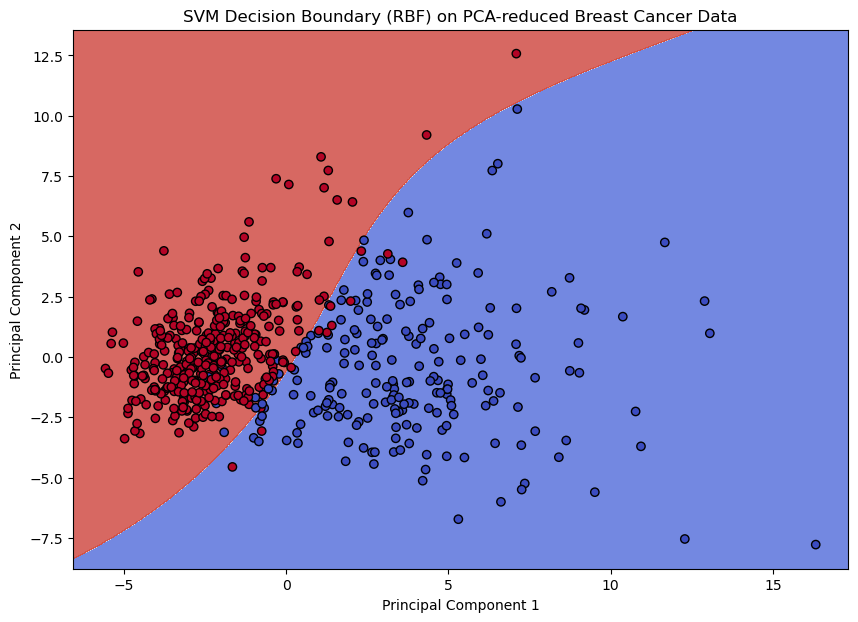

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA

cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print(" 1. Linear SVM ")
linear_svm = svm.SVC(kernel='linear')
linear_svm.fit(X_train, y_train)
y_pred_linear = linear_svm.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_linear):.4f}")
print(classification_report(y_test, y_pred_linear))

print("\n 2. RBF SVM (Default Parameters) ")
rbf_svm = svm.SVC(kernel='rbf')
rbf_svm.fit(X_train, y_train)
y_pred_rbf = rbf_svm.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_rbf):.4f}")
print(classification_report(y_test, y_pred_rbf))

print("\n3. RBF SVM (Tuned with GridSearchCV) ")
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}
grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=5, verbose=0)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
best_svm = grid_search.best_estimator_
y_pred_tuned = best_svm.predict(X_test)
print(f"Tuned Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}")
print(classification_report(y_test, y_pred_tuned))

print("\n 4. Visualizing Decision Boundary (on 2D PCA data) ")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

svm_2d = svm.SVC(kernel='rbf', C=grid_search.best_params_['C'], gamma=grid_search.best_params_['gamma'])
svm_2d.fit(X_pca, y)

def plot_decision_boundary(model, X_pca, y):
    h = .02
    x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
    y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10, 7))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('SVM Decision Boundary (RBF) on PCA-reduced Breast Cancer Data')
    plt.show()

plot_decision_boundary(svm_2d, X_pca, y)